In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/leonardocardozo/Downloads/chopped.csv')
df.head()

,season,season_episode,series_episode,episode_name,episode_notes,air_date,judge1,judge2,judge3,appetizer,entree,dessert,contestant1,contestant1_info,contestant2,contestant2_info,contestant3,contestant3_info,contestant4,contestant4_info
0,1,1,1,"""Octopus, Duck, Animal Crackers""",This is the first episode with only three offi...,"January 13, 2009",Marc Murphy,Alex Guarnaschelli,Aarón Sánchez,"baby octopus, bok choy, oyster sauce, smoked ...","duck breast, green onions, ginger, honey","prunes, animal crackers, cream cheese",Summer Kriegshauser,Private Chef and Nutrition Coach New York NY,Perry Pollaci,Private Chef and Sous chef Bar Blanc New Yo...,Katie Rosenhouse,Pastry Chef Olana Restaurant New York NY,Sandy Davis,Catering Chef Showstoppers Catering at Union...
1,1,2,2,"""Tofu, Blueberries, Oysters""",This is the first of a few episodes with five ...,"January 20, 2009",Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"firm tofu, tomato paste, prosciutto","daikon, pork loin, Napa cabbage, Thai chiles,...","phyllo dough, gorgonzola cheese, pineapple ri...",Raymond Jackson,Private Caterer and Culinary Instructor West...,Klaus Kronsteiner,Chef de cuisine Liberty National Golf Course...,Christopher Jackson,Executive Chef and Owner Ted and Honey Broo...,Pippa Calland,Owner and Chef Chef for Hire LLC Newville PA
2,1,3,3,"""Avocado, Tahini, Bran Flakes""",NaN,"January 27, 2009",Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,"lump crab meat, dried shiitake mushrooms, pin...","ground beef, cannellini beans, tahini paste, ...","brioche, cantaloupe, pecans, avocados",Margaritte Malfy,Executive Chef and Co-owner La Palapa New Y...,Rachelle Rodwell,Chef de cuisine SoHo Grand Hotel New York NY,Chris Burke,Private Chef New York NY,Andre Marrero,Chef tournant L’Atelier de Joël Robuchon Ne...
3,1,4,4,"""Banana, Collard Greens, Grits""","In the appetizer round, Chef Chuboda refused t...","February 3, 2009",Scott Conant,Amanda Freitag,Geoffrey Zakarian,"ground beef, wonton wrappers, cream of mushro...","scallops, collard greens, anchovies, sour cream","maple syrup, black plums, almond butter, waln...",Sean Chudoba,Executive Chef Ayza Wine Bar New York NY,Kyle Shadix,Chef Registered Dietician and Culinary Consu...,Luis Gonzales,Executive Chef Knickerbocker Bar & Grill Ne...,Einat Admony,Chef and Owner Taïm New York NY
4,1,5,5,"""Yucca, Watermelon, Tortillas""",NaN,"February 10, 2009",Geoffrey Zakarian,Alex Guarnaschelli,Marc Murphy,"watermelon, canned sardines, pepper jack chee...","beef shoulder, yucca, raisins, ancho chiles, ...","flour tortillas, prosecco, Canadian bacon, ro...",John Keller,Personal Chef New York NY,Andrea Bergquist,Executive Chef New York NY,Ed Witt,Executive Chef / Wine Director Bloomingdale ...,Josh Emett,Chef de cuisine Gordon Ramsay at The London ...


Filter out the most common appetizer, entree, and dessert ingredients

In [4]:
# Get each of the individual ingredients
ingredients = []
for item in df["appetizer"]:
    while (item.find(",") != -1):
        ingredients.append(item[0:item.find(",")])
        item = item[item.find(",") + 1:]
        item = item.strip()
    ingredients.append(item)
print(ingredients[0:10])

[' baby octopus', 'bok choy', 'oyster sauce', 'smoked paprika', ' firm tofu', 'tomato paste', 'prosciutto', ' lump crab meat', 'dried shiitake mushrooms', 'pink grapefruit']


In [5]:
common_ingredients = pd.Series(ingredients).value_counts()
common_ingredients_df = common_ingredients.to_frame()
ci_df = common_ingredients_df.rename_axis("name").reset_index()
ci_df =ci_df.rename(columns={"name": "Name", 0: "Appearances"})


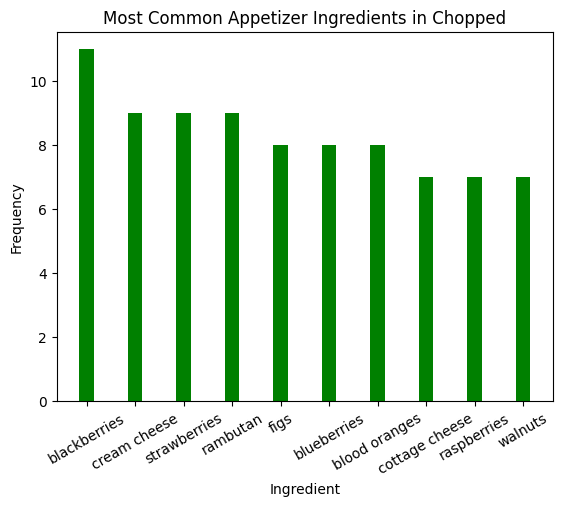

In [18]:
plt.bar(ci_df["Name"][0:10], ci_df["Appearances"][0:10], width = 0.3, color = "Green")
plt.xticks(rotation=30)
plt.title("Most Common Appetizer Ingredients in Chopped")
plt.ylabel("Frequency")
plt.xlabel("Ingredient")
plt.show()


Do the same for entree ingredients

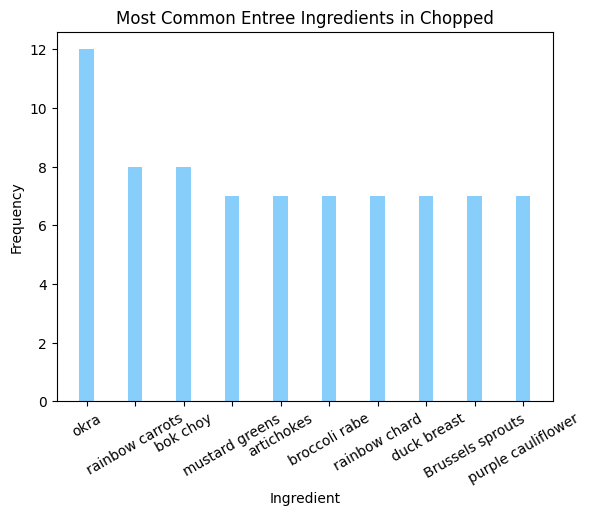

In [21]:
# Get each of the individual ingredients
ingredients = []
for item in df["entree"]:
    while (item.find(",") != -1):
        ingredients.append(item[0:item.find(",")])
        item = item[item.find(",") + 1:]
        item = item.strip()
    ingredients.append(item)

common_ingredients = pd.Series(ingredients).value_counts()
common_ingredients_df = common_ingredients.to_frame()
ci_df = common_ingredients_df.rename_axis("name").reset_index()
ci_df =ci_df.rename(columns={"name": "Name", 0: "Appearances"})
plt.bar(ci_df["Name"][0:10], ci_df["Appearances"][0:10], width = 0.3, color = "#87CEFA")
plt.ylabel("Frequency")
plt.xlabel("Ingredient")
plt.xticks(rotation=30)
plt.title("Most Common Entree Ingredients in Chopped")
plt.show()

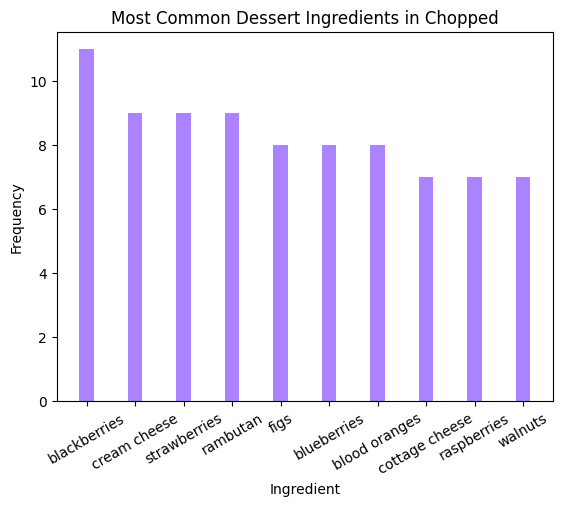

In [24]:
# Desert ingredients
ingredients = []
df = df[df["dessert"].notna()]
for item in df["dessert"]:
    while (item.find(",") != -1):
        ingredients.append(item[0:item.find(",")])
        item = item[item.find(",") + 1:]
        item = item.strip()
    ingredients.append(item)
common_ingredients = pd.Series(ingredients).value_counts()
common_ingredients_df = common_ingredients.to_frame()
ci_df = common_ingredients_df.rename_axis("name").reset_index()
ci_df = ci_df.rename(columns={"name": "Name", 0: "Appearances"})
plt.bar(ci_df["Name"][0:10], ci_df["Appearances"][0:10], width = 0.3, color = "#AB82FF")
plt.xticks(rotation=30)
plt.ylabel("Frequency")
plt.xlabel("Ingredient")
plt.title("Most Common Dessert Ingredients in Chopped")
plt.show()

Judges stuff

In [72]:
# judges = df["judge1"].value_counts()
judge1 = df["judge1"].value_counts()
judge2 = df["judge2"].value_counts()
judge3= df["judge3"].value_counts()
judges = pd.concat([judge1, judge2, judge3]) # create series of all items from all three judges columns
#print(judges)
#print((judges["Scott Conant"])[0])
judges_list = []
for label, value in judges.items(): # loop through series
    if len(judges[label]) > 1:
        total = 0
        for i in range(len(judges[label])):
            total += judges[label][i]
            if (i > 0):
                judges.drop()
        judges[label][0] = total
        
        


TypeError: 'zip' object is not subscriptable